In [55]:
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Newer versions
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pickle
import scipy.sparse
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB


plt.rcParams['figure.dpi'] = 250 #Resolution

# mute warning that assign columns on dataframe   eg,  df["col1"] = df["col11"]
pd.options.mode.chained_assignment = None  # default='warn'



# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)

## Read Files 

In [2]:
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)



# Split into attributes and class
y_df = whole_data["duration_label"]    #class df
x_df = whole_data.drop(['duration_label'], axis=1)    # features df

# train test split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.33, random_state = 123)
print('X_train: {} X_test: {}'.format(X_train.shape, X_test.shape))

X_train: (26800, 5) X_test: (13200, 5)


In [3]:
# Small test Data
# random sample part of data for plotting use
sample_data = whole_data.sample(1000)
# Split into attributes and class
sample_y_df = sample_data["duration_label"]    #class df
sample_x_df = sample_data.drop(['duration_label'], axis=1)    # features df

# train test split
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(sample_x_df, sample_y_df, test_size = 0.33, random_state = 123)
print('X_train: {} X_test: {}'.format(sample_X_train.shape, sample_X_test.shape))

X_train: (670, 5) X_test: (330, 5)


### Explore the relations between n_steps, n_ingredients  with Cooking Time

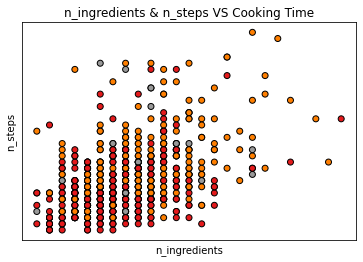

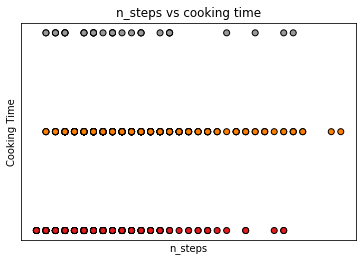

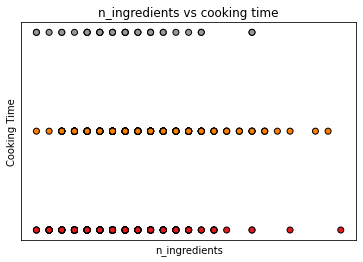

In [4]:
## Only Using n_steps and n_ingredients

# use random sample instead of full size to generate better graph
sample_X_train = sample_X_train.loc[:,["n_ingredients", "n_steps"]]

# Plot the training points
plt.scatter(sample_X_train["n_ingredients"], sample_X_train["n_steps"], c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_ingredients')
plt.ylabel('n_steps')
plt.xticks(())
plt.yticks(())
plt.title("n_ingredients & n_steps VS Cooking Time")
plt.show()

plt.scatter(sample_X_train["n_steps"], sample_y_train, c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_steps')
plt.ylabel('Cooking Time')
plt.xticks(())
plt.yticks(())
plt.title("n_steps vs cooking time")
plt.show()

plt.scatter(sample_X_train["n_ingredients"], sample_y_train, c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_ingredients')
plt.ylabel('Cooking Time')
plt.xticks(())
plt.yticks(())
plt.title("n_ingredients vs cooking time")
plt.show()



As graph shown above, simply using n_ingredients and n_steps cannot do the classification,
for the reason that the numbers of steps / ingredients cannot form clear clusters to classify cooking time

## Only use n_steps and n_ingredients to do prediction

In [5]:
X_train = X_train[["n_steps", "n_ingredients"]]
X_train.head(3)
X_test = X_test[["n_steps", "n_ingredients"]]
X_test.head(3)

,n_steps,n_ingredients
32566,4,6
28547,10,15
6456,8,13


In [6]:
# From workshop 06, using SVM with linear SVM and cubic SVM to do the classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#print(cross_val_score(zero_r, X, y, cv=10))
X = X_train
y = y_train

#try to change C to 1000 or 0.001
C = 1.0  # SVM regularization parameter

models = [DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=50),
          svm.LinearSVC(C=C, max_iter = 200),]
          #svm.SVC(kernel='rbf', gamma=0.7, C=C)]

titles = ['1-R',
          '1-Nearest Neighbour',
          '5-Nearest Neighbour',
          'Decision Tree',
          'LinearSVC',]
          #'SVM with a cubic kernel']

title_training_acc = {}
for title, model in zip(titles, models):
    model.fit(X, y)
    title_training_acc[title] = model.score(X,y)

title_crossvalidation_acc = {}
for title, model in zip(titles, models):
    title_crossvalidation_acc[title] = cross_val_score(model, X, y, cv = 10).mean()

for title in titles:
    print(title, ': Training Acc', title_training_acc[title], '; X-Val Acc', title_crossvalidation_acc[title])
    

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\An

1-R : Training Acc 0.6235074626865672 ; X-Val Acc 0.62294776119403
1-Nearest Neighbour : Training Acc 0.5448507462686567 ; X-Val Acc 0.5225373134328358
5-Nearest Neighbour : Training Acc 0.6070149253731343 ; X-Val Acc 0.5878731343283582
Decision Tree : Training Acc 0.6463059701492537 ; X-Val Acc 0.6320149253731343
LinearSVC : Training Acc 0.6169402985074627 ; X-Val Acc 0.5940298507462687


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Overall, we found that the SVM method using only n_steps and n_ingredients doesn't perform well, as the result is close to 0-R baseline

## Using Stacking Classifier

code from workshop 08

- 'Zero-R',
- 'Logistic Regression',
- 'Decision Tree',
- 'KNN',
- 'GaussianNB',
- 'Logistic Regression'

In [7]:


classifiers = [DummyClassifier(strategy='most_frequent'),
               
          LogisticRegression(random_state=10),
          DecisionTreeClassifier(random_state=10),
          KNeighborsClassifier(),
          GaussianNB(),
        LogisticRegression(random_state=10)]
titles = ['Zero-R',
          'Logistic Regression',
          'Decision Tree',
          'KNN',
          'GaussianNB',
          'Logistic Regression']

meta_classifier = LogisticRegression()
stacker = StackingClassifier(classifiers, meta_classifier)
    

In [8]:
# Do prediction using stacking
for title, model in zip(titles, models):
    model.fit(X_train,y_train)
    start = time.time()
    acc = model.score(X_test, y_test)
    end = time.time()
    t = end-start
    print(title, "Accuracy:",acc, 'Time:', t)
stacker.fit(X_train, y_train)
print("\n\nTotal Performance:")
print('\nStacker Accuracy:', stacker.score(X_test, y_test))

Zero-R Accuracy: 0.6178787878787879 Time: 0.002001523971557617
Logistic Regression Accuracy: 0.5327272727272727 Time: 0.23105239868164062
Decision Tree Accuracy: 0.5956818181818182 Time: 0.21904969215393066
KNN Accuracy: 0.6304545454545455 Time: 0.0030007362365722656


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GaussianNB Accuracy: 0.2642424242424242 Time: 0.002000093460083008


Total Performance:

Stacker Accuracy: 0.6288636363636364


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall, using specific n_steps and n_ingredients may not be good enough

# Neural Net Work Part
# ----------------------------------------------
### Load Vectorized Data and Use Neural Network

## Select k Best features for classification

### Combining 
1. Standarlise
2. TOP K feature selection
3. fit to Neural Network

## 1.1 doc2vec Combining step, ingredients using df Concatenate

In [9]:
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Newer versions
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


# mute warning that assign columns on dataframe   eg,  df["col1"] = df["col11"]
pd.options.mode.chained_assignment = None  # default='warn'

In [10]:
# Read Data
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)

# for each one
step = pd.read_csv(r"data/train_steps_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
step_df = pd.DataFrame(step)
ingr = pd.read_csv(r"data/train_ingr_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
ingr_df = pd.DataFrame(ingr)
name = pd.read_csv(r"data/train_name_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
name_df = pd.DataFrame(name)

# Combining Dataframes
combined_df = pd.concat([step_df,ingr_df,name_df], axis=1)
#combined_df


In [11]:
#Doing classification
X_train = combined_df
y_train = whole_data["duration_label"]

# 1. Standarlise
scaler = StandardScaler()

# 2. Feature Selection (selecting best vectorlised words we can use)
mi = SelectKBest(mutual_info_classif,k=30)  # top k good features

# 3. NN Model
clf = MLPClassifier(max_iter=2000)

# Combining 1,2,3 into pipline
pipeline = Pipeline([('transformer', scaler),('select k best feature', mi), ('estimator', clf)])


# Get Result
print('corss-val noncheating standardised features acc:', np.mean(cross_val_score(pipeline, X_train, y_train, cv=5)))

corss-val noncheating standardised features acc: 0.6621249999999999


As mentioned above, combining steps, ingridients, name matrix and find best 30 features using mutual information

## 1.2 doc2vec Combining step, ingredients, n_steps, n_ingredients using df Concatenate

In [12]:
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)

# Read Data
#vocab = pickle.load(open("train_name_countvectorizer.pkl", "rb"))
step = pd.read_csv(r"data/train_steps_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
step_df = pd.DataFrame(step)
ingr = pd.read_csv(r"data/train_ingr_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
ingr_df = pd.DataFrame(ingr)
name = pd.read_csv(r"data/train_name_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
name_df = pd.DataFrame(name)
nstep = whole_data["n_steps"]
ningr = whole_data["n_ingredients"]

# Combining Dataframes
combined_df = pd.concat([nstep,ningr,step_df,ingr_df,name_df], axis=1)

In [13]:
#Doing classification
X_train = combined_df.iloc[0:1000,]

y_train = whole_data["duration_label"].iloc[0:1000,]

## 1. Standarlise
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# 2. Feature Selection (selecting best vectorlised words we can use)
mi = SelectKBest(mutual_info_classif,k=150)  # top k good features
X_train = mi.fit_transform(X_train,y_train)

#X_test_x2 = x2.transform(X_test)
# 3. NN Model
clf = MLPClassifier(max_iter=2000,random_state=2)




# Get Result
print('corss-val noncheating standardised features acc:', np.mean(cross_val_score(clf, X_train, y_train, cv=5)))

corss-val noncheating standardised features acc: 0.6260000000000001


### 1.3 Find if StandardScaler() will make a difference to our model 

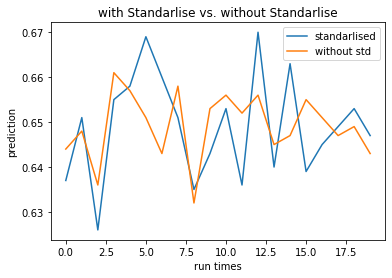

Accuracy with Standarlised model: 0.649
Accuracy without Standarlised model: 0.6492000000000001


In [14]:
## Find if using StandardScaler() will make a difference to our model 

# Store different scores for using StandardScaler() and not
score_std=[]
score_without_std=[]

# iterate through different random state using StandardScaler()
for i in range(0,20):
    X_train = combined_df.iloc[0:1000,]
    y_train = whole_data["duration_label"].iloc[0:1000,]

    ## 1. Standarlise
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    # 2. Feature Selection (selecting best vectorlised words we can use)
    mi = SelectKBest(mutual_info_classif,k=150)  # top k good features
    X_train = mi.fit_transform(X_train,y_train)
    # 3. NN Model
    clf = MLPClassifier(max_iter=2000,random_state=i)
    # Get Result
    score_std.append(np.mean(cross_val_score(clf, X_train, y_train, cv=5)))
    
# iterate through different random state without using StandardScaler()
for i in range(0,20):
    X_train = combined_df.iloc[0:1000,]
    y_train = whole_data["duration_label"].iloc[0:1000,]

    ## 1. Standarlise
    scaler = StandardScaler()
    # 2. Feature Selection (selecting best vectorlised words we can use)
    mi = SelectKBest(mutual_info_classif,k=150)  # top k good features
    X_train = mi.fit_transform(X_train,y_train)
    # 3. NN Model
    clf = MLPClassifier(max_iter=2000,random_state=i)
    # Get Result
    score_without_std.append(np.mean(cross_val_score(clf, X_train, y_train, cv=5)))
    
    
plt.plot(range(len(score_std)), score_std, label='standarlised')
plt.plot(range(len(score_without_std)), score_without_std, label='without std')
plt.title('with Standarlise vs. without Standarlise')
plt.ylabel('prediction')
plt.xlabel('run times')
plt.legend()
plt.show()
print("Accuracy with Standarlised model:", np.mean(score_std))
print("Accuracy without Standarlised model:", np.mean(score_without_std))

As plot shown above, using standarlised scaler doesn't affect much accuracy for our model, as the steps, ingredients are already standarlised and the standarlisation of n_steps and n_ingr doesn't affect the overall performance

# 





# Run From HERE


#  CountVec And Neural Networking





## Preprocessing

### 2.1 countVec Combining step, ingredients using sparce matrix Concatenate


#### 2.1.1 Select top 4000 features from ingredients, steps separately, THEN combing them into dataframe for Train and Test

Since The feature Selection process calculates independence, so select for each attribute and combine them together,
Then Select Best Features from a combined df

In [7]:
##### Load Test Data

whole_test_data = pd.read_csv(r"data/test/recipe_test.csv", index_col = False, delimiter = ',', header=0)
# Read Data and convert to dataframe
test_step = scipy.sparse.load_npz(r"data/test/test_steps_vec.npz")
# ingr data
test_ingr = scipy.sparse.load_npz(r"data/test/test_ingr_vec.npz")
# name data
test_name = scipy.sparse.load_npz(r"data/test/test_name_vec.npz")

##### Load Train Data
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)
y_train = whole_data["duration_label"]

##### Use MI To PreProcess the Data

# Feature Selection to reduce size
mi_pre = SelectKBest(mutual_info_classif,k=2500)  # top k good features

# Read Data and convert to dataframe
step = scipy.sparse.load_npz("data/train_steps_vec.npz")
step = mi_pre.fit_transform(step,y_train)   # Feature Selection to reduce size
test_step = mi_pre.transform(test_step)

# ingr data
ingr_selector = SelectKBest(mutual_info_classif,k=2500)
ingr = scipy.sparse.load_npz("data/train_ingr_vec.npz")
ingr = ingr_selector.fit_transform(ingr,y_train)   # Feature Selection to reduce size
test_ingr = ingr_selector.transform(test_ingr)

# name data
name = scipy.sparse.load_npz("data/train_name_vec.npz")
name = mi_pre.fit_transform(name,y_train)   # Feature Selection to reduce size
test_name = mi_pre.transform(test_name)


## GET COMBINED DATA

# Combining TRAINING Dataframes
nstep = whole_data["n_steps"]
ningr = whole_data["n_ingredients"]
combined_matrix = hstack((step, ingr, name))
combined_vec_df = pd.DataFrame.sparse.from_spmatrix(combined_matrix, index=None, columns=None)
combined_df = pd.concat([nstep,ningr,combined_vec_df], axis=1)

# Combining TEST Dataframes
test_nstep = whole_test_data["n_steps"]
test_ningr = whole_test_data["n_ingredients"]
test_combined_matrix = hstack((test_step, test_ingr, test_name))
test_combined_vec_df = pd.DataFrame.sparse.from_spmatrix(test_combined_matrix, index=None, columns=None)
test_combined = pd.concat([test_nstep,test_ningr,test_combined_vec_df], axis=1)

In [8]:
# Save Data To disk
## dump combined df and test_combined_df into disk:
pickle.dump(combined_df, open('./model/train_combined_df_small.sav', 'wb'))
pickle.dump(test_combined, open('./model/test_combined_df_small.sav', 'wb'))


## Method1: DEEP LEARNING ONLY

#### 2.1.2 Using Combined Dataframe (n_steps, n_ingrs, steps, ingrs), use grid search to find optimum parameters
1. choose optimal top k features
2. reduce the size of the model by using top k features
3. use grid search to find best parameters for NN algorithm

#### 2.1.3 Using Grid Search to Find Optimal Parameters
Code from Practical-11-2021





### Training

In [1]:


#Doing classification

# Get 10902 Features Dataframe First
X_train = pickle.load(open('./model/train_combined_df.sav', 'rb'))

# Use K value Features, find optimal K
for k in range(9000,1000, -1000):

    mi = SelectKBest(mutual_info_classif, k=k)
    X_train = mi.fit_transform(X_train, y_train)
    
    # 3. #####  NN Classification (selecting best vectorlised words we can use)

    # without grid search tuning
    clf = MLPClassifier(max_iter=2000, alpha=1.0)
    clf.fit(X_train, y_train)
    print(k, " features NN Train Score: ", clf.score(X_train,y_train))
    print(k, " features NN Test Score: ", np.mean(cross_val_score(clf,X_train,y_train,cv=5,n_jobs=-1)))

#     ##  GRID SEARCH

#     print('MLP acc without tuning, alpha=1:', clf.score(X_train, y_train))
#     #arguments of MLPClassifier and a list of values for them to search and find the best.
#     alphas = [np.power(10.0, i) for i in range(-5, 2)]
#     hidden_sizes = [[100], [10, 10], [100,50,50,10]]
#     param_grid = {'alpha': alphas, 'hidden_layer_sizes':hidden_sizes}

#     # Do Grid Search
#     gs = GridSearchCV(estimator=clf,
#                       param_grid=param_grid,
#                       scoring='accuracy',
#                       cv=3,
#                       n_jobs=-1,
#                       verbose=1)
#     gs.fit(X_train, y_train)

#     # Print best_params
#     best_params = gs.best_params_
#     print('best_params', best_params)

#     # Do Neural Network with best parameters
#     clf = MLPClassifier(max_iter=2000, **best_params)
#     clf.fit(X_train, y_train)

#     # if current score is higher than previous K's score, store this model's index
#     cur_score = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
#     print('acc with best params:', cur_score)
#     print('\n\n\n')

NameError: name 'pickle' is not defined

In [6]:
print(clf.score(X_train, y_train))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.86315



### Dump Data to Disk:

1. Trained Mi Feature Selection Model
2. Trained NN Model
3. Combined Train dataframe 
3. Combined Test Model 
    - ( Using 3 small vecorised matrix (name, ingr, steps), selecting 4000 features from each of them and combined them to a 10908 attributes dataframe for test and training data) 


In [7]:
#1.
# # dump nn model into disk
pickle.dump(clf, open('./model/nn_model_2000.sav', 'wb'))

# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(mi_file_name, 'rb'))

In [8]:
#2.
# # dump mi feature selection model into disk
pickle.dump(mi, open('./model/top_2000_mi_model.sav', 'wb'))

NameError: name 'mi' is not defined

## Testing
Load Data and Do Predicting

In [10]:
# Load Preprocessed Test Data:
X_test = pickle.load(open('./model/test_combined_df_small.sav', 'rb'))

# Select which model and mi selector we wanna use
model = pickle.load(open('./model/nn_model_2000.sav', 'rb'))
#mi_test = pickle.load(open('./model/top_2000_mi_model.sav', 'rb'))

# Select k best features using above mi
#X_test = mi_test.transform(X_test)

#Use Model to Test Data
result = model.predict(X_test)

# Output To CSV
out=pd.DataFrame(result)
out.index.name='id'
out.index += 1
out.to_csv('./output/predict_label.csv',header = ['duration_label'])

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Reflects:

### The Result Showing below displays different K value and its score, it appears that higher K value gives better results

### 1st First Attempt 100 features
 K value for Each Attribute: 500
 , Combined Feature Num: 500*3 = 1500 attributes

- Combined Feature Selection K value: 20
- MLP acc without tuning: 0.7727
- best_params {'alpha': 0.1, 'hidden_layer_sizes': [100]}
- acc with best params: 0.76615



- K value(Selectbest features):  60
- MLP acc without tuning: 0.8501
- best_params {'alpha': 0.001, 'hidden_layer_sizes': [10, 10]}
- acc with best params: 0.800925


- K value(Selectbest features):  100
- MLP acc without tuning: 0.91745
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [80, 50, 20]}
- acc with best params: 0.816525
- Test Accuracy: 0.80266  



- K value(Selectbest features):  140
- MLP acc without tuning: 0.95355
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.806175



- K value(Selectbest features):  180
- MLP acc without tuning: 0.982475
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.811525

### 2nd Second Attempt  1500 features
##### After finding that the larger k value may lead to better result, this time, starts from higher k value
##### Although Higher K gets a 1.0 accuracy, it may lead to overfitting, so trying to test with test data

K value for Initialize: 2000, Combined K value: 2000*3 = 6000 attributes

- K value(Selectbest features):  1500
- Index value (i):  0    (Use this index to get models from list)
- MLP acc without tuning: 1.0
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.830475
- Test Accuracy: 0.81333  



- K value(Selectbest features):  1200
- Index value (i):  1    (Use this index to get models from list)
- MLP acc without tuning: 0.999925
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.829225
- Test Accuracy: 0.80833  




- K value(Selectbest features):  900
- Index value (i):  2    (Use this index to get models from list)
- MLP acc without tuning: 0.996875

### 3rd Third Attempt 12096 features
- At this Stage, Try Using Larger K as Larger K provides better results
- K value for Each Attribute: 5000, 
- Combined Feature Num: 5000+5000+2906 = 12906 attributes
- Combined Feature Selection:  Without Feature Selection

- MLP acc without tuning: 1.0
- Test Accuracy: 0.78 (Worst)
- cross-val Score:  0.782225
##### This Attempt,  by using raw data to fit the MLP classifer with 12906 attributes, the classifer may be overfitting and resulting a lower accuracy


### 4th Fourth Attempt 5000 features
- At this Stage, Try Using Larger K as Larger K provides better results
- K value for Each Attribute: 4000, 
- Combined Feature Num: 4000+4000+2906 = 10906 attributes
- Combined Feature Selection:  Select Top 5000 Attributes

- MLP acc without tuning: 1.0
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.8524
- Test Accuracy: 0.81400     (Best)
- cross-val Score:  0.8039
- Trained for 3 hours



### 5th Fifth Attempt 2000 features without selection overall
- K value for Each Attribute: 2100
- Combined Feature Selection: No Feature Selection 
- MLP acc without tuning: 0.999975
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.86315
- Test Accuracy: 0.80966
- cross-val Score:  0.80365
- 1.5 hours training
- 2000 features NN cross-val Score:  0.80365









### As shown above:
- Higher Number of Features generate good results(5000 features)
- independent selected features combined together doesn's ensure good results, then:
- some attributes (name, ingr, steps) may outperforms other attribute, so the final combined dataframe using feature selection may have good results on a single attribute(maybe steps)


## Diag Plot

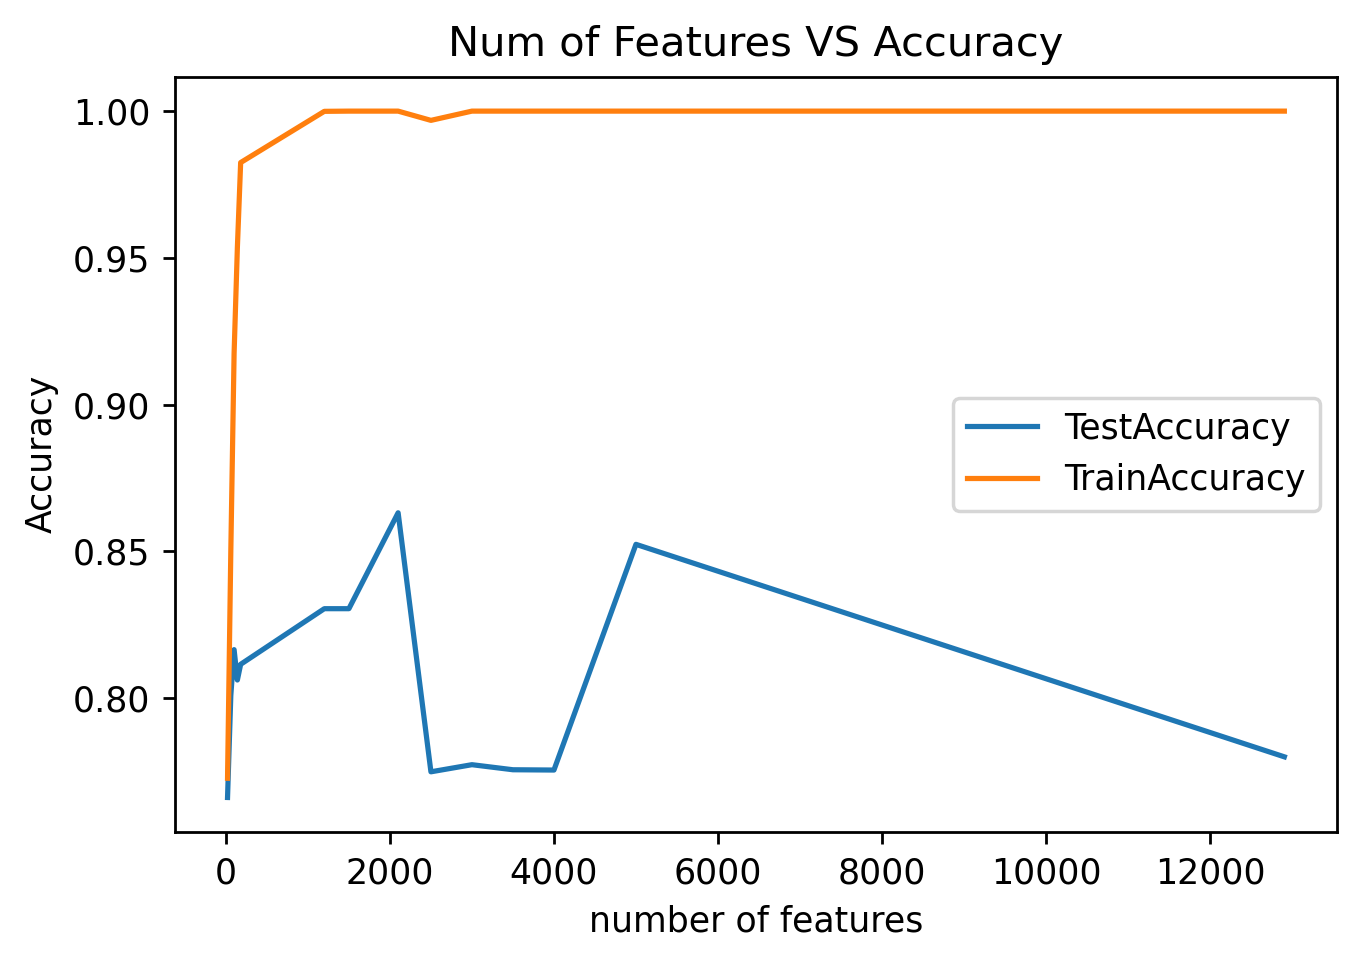

In [59]:
# For Cross_Val Test Accuracy
x = [20, 60, 100, 140, 180, 1200, 1500, 2100, 2500, 3000, 3500, 4000, 5000, 12906]
y = [0.76615, 0.800925, 0.816525, 0.806175, 0.811525, 0.830475, 0.830475, 0.86315, 0.7749, 0.777325, 0.7756, 0.7755, 0.8524, 0.78]

# For Training Test Accuracy
x2 = [20, 60, 100, 140, 180, 1200, 1500, 2100, 2500, 3000, 3500, 4000, 5000, 12906]
y2 = [0.7727, 0.8501, 0.91745, 0.95355, 0.982475, 0.999925, 1.0, 1.0, 0.99685, 1.0, 1.0, 1.0, 1.0, 1.0]

plt.plot(x, y, label='TestAccuracy')
plt.plot(x2, y2, label='TrainAccuracy')
plt.title('Num of Features VS Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of features')
plt.legend()
plt.show()

# Method 2: Decision Tree

### Training

In [48]:

# Load Data
X_train = pickle.load(open('./model/train_combined_df.sav', 'rb'))
y_train = whole_data["duration_label"]

# PreProcessing Get Top 5000 features
mi_model = pickle.load(open('./model/top_5000_mi_model - 0.81400.sav', 'rb'))
X_train = mi_model.transform(X_train)

# Using DT
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Training Score:", dt.score(X_train, y_train))
print("Decision Tree Testing Score:", np.mean(cross_val_score(dt, X_train, y_train, cv=5, n_jobs=-1)))



E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Decision Tree Training Score: 1.0
Decision Tree Testing Score: 0.7343500000000001


### Testing

## Reflects

### First Attempt:
- Decision Tree Training Score: 1.0
- Decision Tree Testing Score: 0.7343500000000001


#### As shown above, Decision Tree Performs bad as it uses too many features and decisions

# Method 3: Random Forest

### Training

In [49]:

# Load Data
X_train = pickle.load(open('./model/train_combined_df.sav', 'rb'))
y_train = whole_data["duration_label"]

# PreProcessing Get Top 5000 features
mi_model = pickle.load(open('./model/top_5000_mi_model - 0.81400.sav', 'rb'))
X_train = mi_model.transform(X_train)

# Using rf
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
print("Random Forest Training Score:", rf.score(X_train, y_train))
print("Random Forest Testing Score:", np.mean(cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Random Forest Training Score: 0.9902
Random Forest Testing Score: 0.76285


### Testing

In [43]:
# Load Preprocessed Test Data:
X_test = pickle.load(open('./model/test_combined_df.sav', 'rb'))

# PreProcessing Get Top 5000 features
mi_model = pickle.load(open('./model/top_5000_mi_model - 0.81400.sav', 'rb'))
X_test = mi_model.transform(X_test)

# Select which stack model we wanna use
model = rf

#Use Model to Test Data
result = model.predict(X_test)

# Output To CSV
out=pd.DataFrame(result)
out.index.name='id'
out.index += 1
out.to_csv('./output/predict_label_rf.csv',header = ['duration_label'])

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### Reflects


### First Attempt:
- top 5000 features
- n_estimators = 10
- Random Forest Training Score: 0.9902
- Random Forest Testing Score: 0.76285
OverFitting, Testing Score not good

# Method 4: Multinomial NB VS Gaussian NB
## 
Using top 5000 Features
- Explore Multinomial NB VS Gaussian NB,
- Multinomial NV uses for Discrete, word count
- Gaussian NVB works for Continuous

### Train: MultiNomial NB VS Gaussian NB

In [53]:
# Load Data
X_train = pickle.load(open('./model/train_combined_df.sav', 'rb'))
y_train = whole_data["duration_label"]

# PreProcessing Get Top 5000 features
mi_model = pickle.load(open('./model/top_5000_mi_model - 0.81400.sav', 'rb'))
X_train = mi_model.transform(X_train)

# Using MNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
print("MNB Training Score:", MNB.score(X_train, y_train))
print("MNB Testing Score:", np.mean(cross_val_score(MNB, X_train, y_train, cv=5, n_jobs=-1)))

GNB = GaussianNB()
GNB.fit(X_train, y_train)
print("GNB Training Score:", GNB.score(X_train, y_train))
print("GNB Testing Score:", np.mean(cross_val_score(GNB, X_train, y_train, cv=5, n_jobs=-1)))



E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MNB Training Score: 0.7281
MNB Testing Score: 0.718225
GNB Training Score: 0.340125
GNB Testing Score: 0.32599999999999996


### Reflects:

- MNB Training Score: 0.7281
- MNB Testing Score: 0.718225
- GNB Training Score: 0.340125
- GNB Testing Score: 0.32599999999999996

#### MNB performs Way much better than GNB
- Useful Link: 
https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/#:~:text=Multinomial%20naive%20Bayes%20assumes%20to,very%20often%2C%20its%20frequency).&text=The%20Gaussian%20Naive%20Bayes%2C%20instead,for%20more%20generic%20classification%20tasks.

# Method 5: Stacking With DT, RF, NN

### As Above Methods Showing, The Data Set We prefer:
#### - 1. Combine: name, ingr, steps  ->  10906 features Dataframe   
        - X_train = "model/train_combined_df.sav"
#### - 2. Feature Selection, Select Top 5000 Feature from 1 Dataframe  
        - mi_model = "model/top_5000_mi_model - 0.81400.sav"
        - X_train_5000 = mi_model.transform(X_train)
#### - 3. Train Neural NetWork Classifier Using Above Data with "X_train_5000"
        - NN_Model: "model/nn_model - 0.81400.sav"
#### - 4. Use Model
        - NN_Model.predict(X_test_5000)



- Use Stacking Algorithm combining Neural Networks 

1. Neural Network as NN, Explored through previous 4th attempt
2. DataSet Use Top 5000 Feature Dataset

#### Training

In [38]:
start_time = time.time()

# Load Data
X_train = pickle.load(open('./model/train_combined_df.sav', 'rb'))
y_train = whole_data["duration_label"]

# PreProcessing Get Top 5000 features
mi_model = pickle.load(open('./model/top_5000_mi_model - 0.81400.sav', 'rb'))
X_train = mi_model.transform(X_train)

## Stacking Algorithms
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=10)),
    ('NN',  MLPClassifier(max_iter=2000, alpha=1.0, hidden_layer_sizes=[100], random_state=10)),
]

# Build Stacking Model
stack_model = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv = 3,
    n_jobs = -1,
)


# Fit the model
stack_model.fit(X_train, y_train)

# get Score
print("--- Running time: %s seconds ---" % (time.time() - start_time))
print("Stacking Score: ", stack_model.score(X_train, y_train))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


--- Running time: 1456.2480590343475 seconds ---
Stacking Score:  0.9123


Since We are predicting the testing data without labels(unsupervised). Therefore we are using scoring function with X_train and y_train. The Optimal accuracy result should be closer to 1 but may not equal to one to prevent overfitting issues

### Dump Model to Disk

In [39]:
#2.
# # dump mi feature selection model into disk
pickle.dump(stack_model, open('./model/stacking_model_selectfeature_5000.sav', 'wb'))

#### Testing

In [44]:
# Load Preprocessed Test Data:
X_test = pickle.load(open('./model/test_combined_df.sav', 'rb'))

# PreProcessing Get Top 5000 features
mi_model = pickle.load(open('./model/top_5000_mi_model - 0.81400.sav', 'rb'))
X_test = mi_model.transform(X_test)

# Select which stack model we wanna use
model = pickle.load(open('./model/stacking_model_selectfeature_5000.sav', 'rb'))

#Use Model to Test Data
result = model.predict(X_test)

# Output To CSV
out=pd.DataFrame(result)
out.index.name='id'
out.index += 1
out.to_csv('./output/predict_label_stacking.csv',header = ['duration_label'])

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### Reflection

### First Attempt
- 10892 Features Using 
1. Random Forest
2. Decision Tree
3. Neural Network
- Stacking Score:  0.966875
- Test Score: 0.80533

### Second Attempt
- 5000 Features Using 
1. Random Forest
2. Decision Tree
3. Neural Network
- Stacking Score:  0.966875
- Test Score 0.81300

##### Since Our Mode is overfitting, reduce top k features and remove the decision tree classifier 

#### It's worth noting that when number of features are fixed(k value), stacking with random forest/decision tree/NN  performs worse than single NN

### Third Attempt

- 2000 Features Using 
1. Random Forest
2. Decision Tree
3. Neural Network
- Stacking Score:  0.92
- Test Score 0.80966

### Fourth Attempt

- 5000 Features Using 
1. Random Forest
2. Neural Network
- Stacking Score:  0.9123
- Test Score 0.81366



##

## Reflections2

## Stacking VS Stacking VS NN


## 

Use top 5000 Features Data Frame, Results:

- Stacking (with rf, DT, NN) Score:  
        - Training: 0.9297
        - Testing: 0.81300
        
- Only NN Score:
        - Training: 0.8524
        - Testing: 0.81400
        
- Stacking (with rf, NN) Score:  
        - Training: 0.1923
        - Testing: 0.81366

## Find Best K value for Neural Network Using Loop

Max Test: k = 2450
- Total K = 2450 *3 = 7350

#### As Test Shown, Selecting top 5000 features is a good idea, we cannot run all possible k values as the dataset is too big

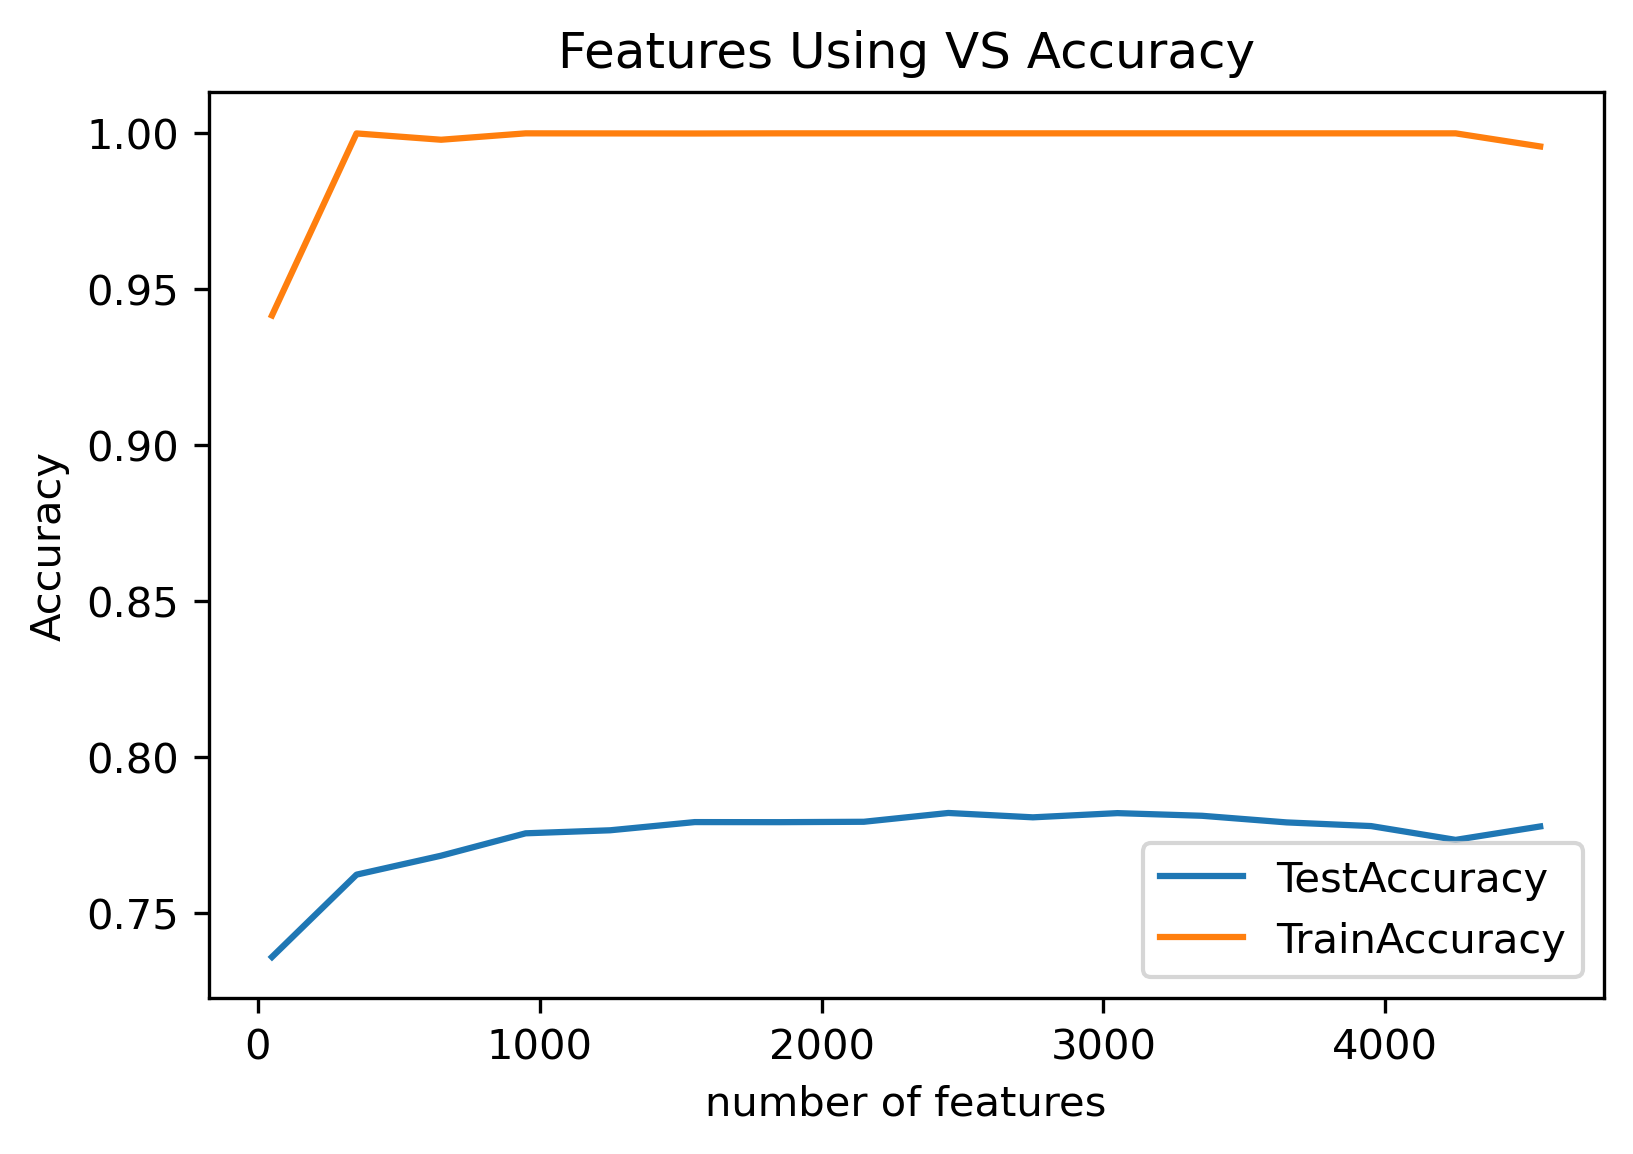

K value for each attributes getting max Test accuracy: 2450
Total num Features = name + ingr + steps = 2450 +2450 + 2450 = 7350


In [37]:
sr = '''
MLP acc Train: 0.941625
MLP acc Cross_val: 0.7359251571659774
MLP acc Train: 0.999975
MLP acc Cross_val: 0.76232503345207
MLP acc Train: 0.99795
MLP acc Cross_val: 0.7684001065828355
MLP acc Train: 1.0
MLP acc Cross_val: 0.7755750665928041
MLP acc Train: 0.999975
MLP acc Cross_val: 0.7765500590942103

MLP acc Train: 0.99995
MLP acc Cross_val: 0.7791749972240382

MLP acc Train: 1.0
MLP acc Cross_val: 0.7791501953440542

MLP acc Train: 1.0
MLP acc Cross_val: 0.7792752228435229

MLP acc Train: 1.0
MLP acc Cross_val: 0.7821002222220698

MLP acc Train: 1.0
MLP acc Cross_val: 0.7807001365974603

MLP acc Train: 1.0
MLP acc Cross_val: 0.7820501215995227

MLP acc Train: 1.0
MLP acc Cross_val: 0.7812001415979601

MLP acc Train: 1.0
MLP acc Cross_val: 0.7790751522200384

MLP acc Train: 1.0
MLP acc Cross_val: 0.7779000947200071

MLP acc Train: 1.0
MLP acc Cross_val: 0.7734753028342732

MLP acc Train: 0.9958
MLP acc Cross_val: 0.7777751609681948'''

import re
ls = re.findall(r'(\d.\d+)', sr)

kl = []
Test_Accuracy = []
Train_Accuracy = []
i=0
for num in ls:
    num = float(num)
    
    if num > 0.85:
        Train_Accuracy.append(num)
        
        kl.append(50 + 300*i)
        i+=1
    else:
        Test_Accuracy.append(num)
# For Submission Test Accuracy

plt.plot(kl, Test_Accuracy, label='TestAccuracy')
plt.plot(kl, Train_Accuracy, label='TrainAccuracy')
plt.title('Features Using VS Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of features')
plt.legend()
plt.show()
print("K value for each attributes getting max Test accuracy:", kl[Test_Accuracy.index(max(Test_Accuracy))])
print("Total num Features = name + ingr + steps = 2450 +2450 + 2450 = 7350")

# 
# Bibliograhy:
# 

Generating Personalized Recipes from Historical User Preferences. Bodhisattwa Prasad Majumder,
Shuyang Li, Jianmo Ni, Julian McAule+y, in Proceedings of the 2019 Conference on Empirical
Methods in Natural Language Processing and the 9th International Joint Conference on Natural
Language Processing (EMNLP-IJCNLP), 2019.